In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Useful Functions
def Calc_eqWidth2(data, start, finish, cIntensity):
    """PASO 1
    Función para calcular el Equivalent Width de acuerdo a la definición de arriba.
    
    data: DataFrame que contiene los datos
    start: Inicio (En Angstroms) del rango de integración
    finish: Fin (En Angstroms) del rango de integración
    cIntensity: Intensidad de fondo
    """
    df = pd.DataFrame()
    df['wavelength'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['wavelength']
    df['I'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['I']

    df['Integrand'] = 1 - (df['I'] / cIntensity)

    # Calculate the equivalent width using numerical integration (trapezoidal rule)
    eqWidth = np.trapz(df['Integrand'], df['wavelength'])

    return df, eqWidth

def vertPos_COG(eqWidth, wavelength):
    """PASO 2"""
    return np.log10(eqWidth/wavelength)

def NAtoms_LowerState(f, wavelength, x):
    """PASO 3"""
    return 10**(x - np.log10(f*(wavelength/5000)))

def AtomsRatioStates(gb,ga,Eb,Ea):
    """PASO 4"""
    x = (Eb-Ea)*1.60218e-19
    return (gb/ga) * np.exp(-(x)/(9.02e-20))

def AtomsRatioIonized(z1,z2,chi):
    a = 1.274e27
    chi = chi * 1.60218e-19
    return (2 * z2)/(1.25e19*z1) * a * np.exp(-chi/9.02e-20)

def AtomAbundance(Total):
    return np.log10(Total/(6.59e23*1.5)) + 12

In [3]:
data = pd.read_csv('procyon.txt', sep=' ', header=None)
data.columns = ['px', 'I']
data.describe()

,px,I
count,1530.00000,1530.000000
mean,764.50000,25913.158824
std,441.81727,2980.018159
min,0.00000,5901.000000
25%,382.25000,24508.250000
50%,764.50000,26909.000000
75%,1146.75000,27831.750000
max,1529.00000,32766.000000


In [4]:
idx = data[["I"]].idxmax()
data.iloc[idx] = 28832
data.iloc[idx]

,px,I
444,28832,28832


In [5]:
pos_Halpha = data['I'].idxmin()
print("la posicion de Halpha es el pixel:" ,pos_Halpha)

la posicion de Halpha es el pixel: 780


In [6]:
stepsize = 1/11 # Orden 1
start = 6563.0-(pos_Halpha*stepsize) 
stop = 6563.0 + ((data['px'].size - pos_Halpha)*stepsize)

start, stop

(6492.090909090909, 6631.181818181818)

In [7]:
wavelength = np.arange(start=start, stop=stop, step=stepsize)
wavelength.size, wavelength[pos_Halpha]

(1530, 6562.999999999935)

In [8]:
data = data.drop(['wavelength'], axis=1, errors='ignore')

data.insert(column='wavelength', value=wavelength, loc=2)
data.describe()

,px,I,wavelength
count,1530.000000,1530.000000,1530.000000
mean,783.054248,25910.587582,6561.590909
std,842.626519,2975.795662,40.165206
min,0.000000,5901.000000,6492.090909
25%,382.250000,24508.250000,6526.840909
50%,765.500000,26909.000000,6561.590909
75%,1147.750000,27831.750000,6596.340909
max,28832.000000,29547.000000,6631.090909


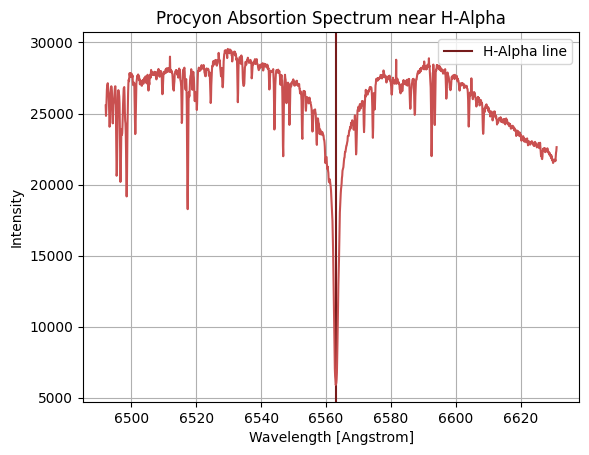

In [9]:
plt.axvline(x = data['wavelength'].loc[pos_Halpha], color = '#761B1B', label = 'H-Alpha line')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Intensity')
plt.title('Procyon Absortion Spectrum near H-Alpha')
plt.plot(data['wavelength'], data['I'], color = '#C95050')
plt.grid()
plt.legend()
plt.show()

In [10]:
def plot_spectrum(data, start, finish, hor = None, ver = None):
    """Se define una función para graficar el espectro de absorción, dado un rango de wavelengths.
    El propósito es poder ubicar el rango al que pertenece una línea de absorción
    """
    filtered_data = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]

    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Intensity')
    plt.title('Absorption Spectrum')
    plt.plot(filtered_data['wavelength'], filtered_data['I'])
    if (hor != None):
        plt.axhline(y = hor, color='b', label = 'underlying continuum intensity')
    if (ver != None):
        plt.axvline(x = ver, color = 'r', label = 'Spectral line')
    
    plt.grid()
    plt.show()

In [11]:
def Calc_eqWidth2(data, start, finish, cIntensity):
    """PASO 1
    Función para calcular el Equivalent Width de acuerdo a la definición de arriba.
    
    data: DataFrame que contiene los datos
    start: Inicio (En Angstroms) del rango de integración
    finish: Fin (En Angstroms) del rango de integración
    cIntensity: Intensidad de fondo
    """
    df = pd.DataFrame()
    df['wavelength'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['wavelength']
    df['I'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['I']

    df['Integrand'] = 1 - (df['I'] / cIntensity)

    # Calculate the equivalent width using numerical integration (trapezoidal rule)
    eqWidth = np.trapz(df['Integrand'], df['wavelength'])

    return df, eqWidth

## Hydrogen I
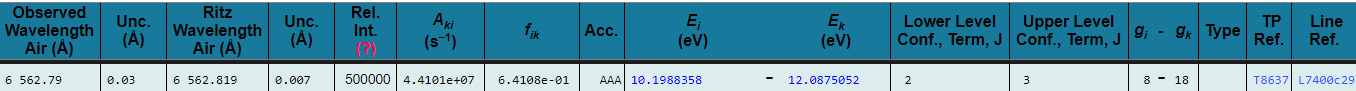

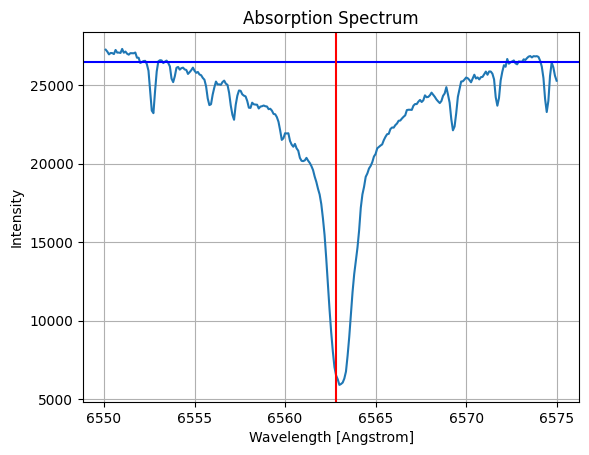

In [24]:
plot_spectrum(data, 6550,6575, ver=6562.8, hor=26500
              )

In [25]:
_, HI6562_eqWidth = Calc_eqWidth2(data=data, start=6555, finish=6571,cIntensity=26500)
print("HI6562 eqWidth = ",HI6562_eqWidth)

HI6562 eqWidth =  3.098034305314507


## Line Comparison

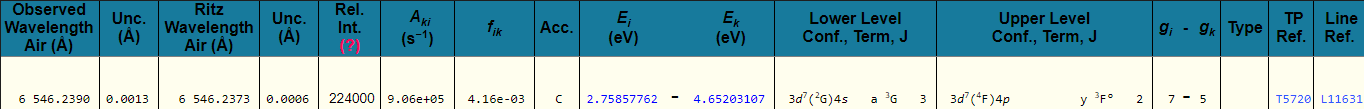

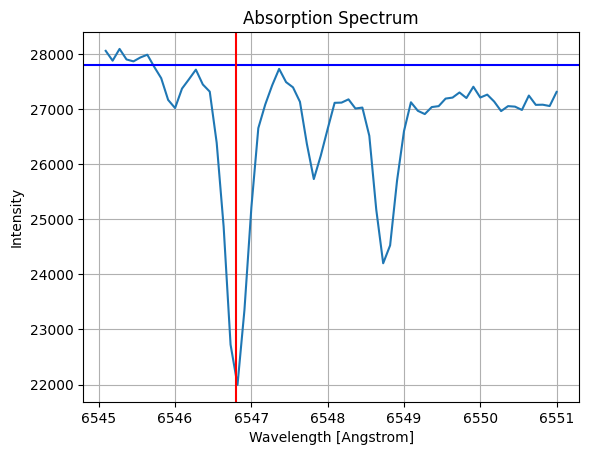

In [38]:
plot_spectrum(data, 6545,6551, ver=6546.8, hor=27800
              )

In [55]:
_, FeI6546_eqWidth = Calc_eqWidth2(data=data, start= 6546.3, finish=6547.4, cIntensity=27800)
print("FeI6546 equivalent width is: ",FeI6546_eqWidth)

print("Ratios are", AtomsRatioIonized(z1=23.50, z2=37.32, chi=7.9024) , AtomsRatioIonized(z1=23.50, z2=37.32, chi=7.9024) * AtomsRatioIonized(z1=37.32, z2=21.35, chi=7.9024))

FeI6546 equivalent width is:  0.08238881621967656
Ratios are 259.48917392012163 24256.099107805414


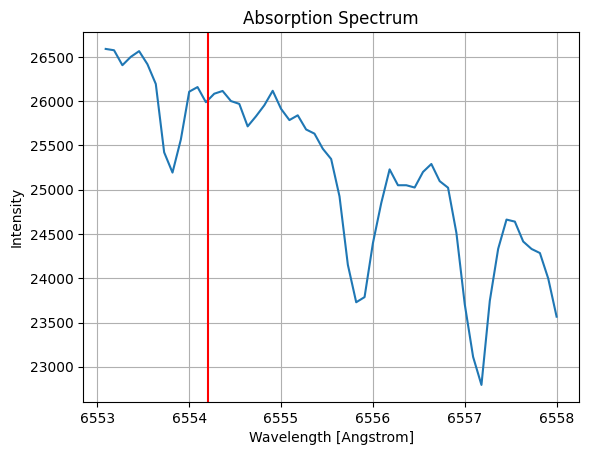

In [39]:
plot_spectrum(data, 6553,6558, ver=6554.2
              )

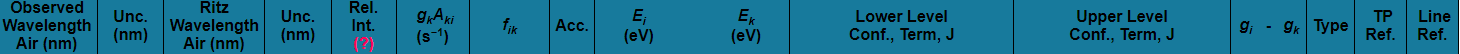



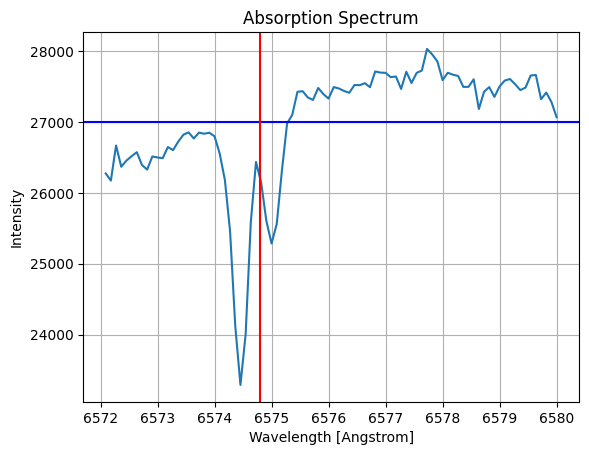

In [12]:
plot_spectrum(data, 6572,6580, hor=27000, ver=6574.8
            )


In [13]:
_, FeI6575_eqWidth = Calc_eqWidth2(data=data, start=6573.9,finish=6574.8, cIntensity=27000)
print("FeI6575 equivalent width is: ",FeI6575_eqWidth)

y2 = vertPos_COG(FeI6575_eqWidth, 6575)
print("COW Vertical position is: ",y2)

#So, looking at the COW graph, we find:
x = 11.4

NFeI6575_LowerState = NAtoms_LowerState(f=2.79e-04, wavelength=6575, x=x)
print("Number of atoms of FeI6575 in Lower State: ", NFeI6575_LowerState)

NFeI6575 = NFeI6575_LowerState*(1 + AtomsRatioStates(7,7,4.4732,2.5891))
print("Number of atoms of FeI6575: ", NFeI6575*1)

NFe_Total = NFeI6575*(1 + AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) + AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) * AtomsRatioIonized(z1=46.72, z2=23.06, chi=7.9024) )
print("Number of atoms of Fe: ", NFe_Total)

print(AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) , AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) * AtomsRatioIonized(z1=46.72, z2=23.06, chi=7.9024))

FeAbundance = AtomAbundance(NFe_Total)
print("Fe Abundance: ", FeAbundance)

FeI6575 equivalent width is:  0.048368686868642874
COW Vertical position is:  -5.1333314600037205
Number of atoms of FeI6575 in Lower State:  684652256568020.6
Number of atoms of FeI6575:  708753735563246.2
Number of atoms of Fe:  1.4306772658080193e+19
247.2128338914353 19937.603395649294
Fe Abundance:  7.160565002397685


Fe I

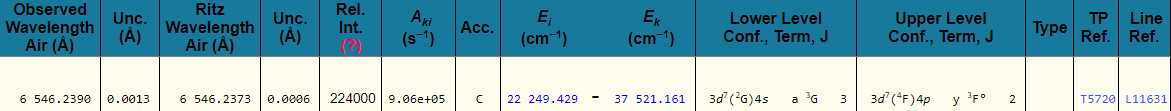

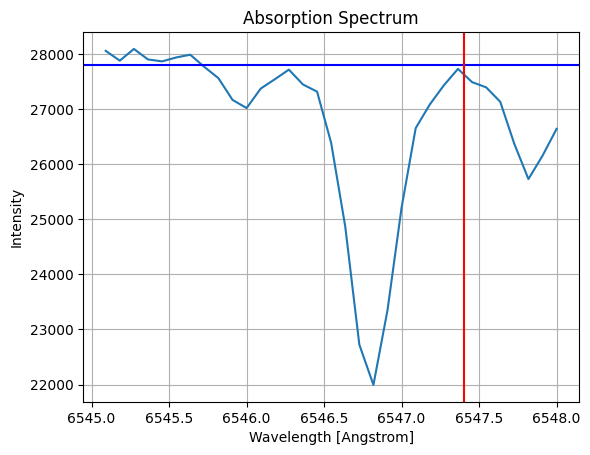

In [14]:
plot_spectrum(data, 6545,6548, ver=6547.4, hor=27800
            )

In [15]:
_, FeI6546_eqWidth = Calc_eqWidth2(data=data, start= 6546.3, finish=6547.4, cIntensity=27800)
print("FeI6546 equivalent width is: ",FeI6546_eqWidth)

y = vertPos_COG(FeI6546_eqWidth, 6546.2)
print("Vertical position of the COG is: ",y)

x = 12

NFeI6546_LowerState = NAtoms_LowerState(f=4.16e-03, wavelength=6546.2, x=x)
print("Number of atoms of FeI6546 in Lower State: ", NFeI6546_LowerState)

NFeI6546 = NFeI6546_LowerState*(1 + AtomsRatioStates(5,7,4.652,2.758))
print("Number of atoms of FeI6546: ", NFeI6546)

NFe_Total = NFeI6546*(1 + AtomsRatioIonized(z1=23.50, z2=37.32, chi=7.9024) + AtomsRatioIonized(z1=23.50, z2=37.32, chi=7.9024) * AtomsRatioIonized(z1=37.32, z2=21.35, chi=7.9024) )
print("Number of atoms of Fe: ", NFe_Total)

FeAbundance = AtomAbundance(NFe_Total)
print("Fe Abundance: ", FeAbundance)

FeI6546 equivalent width is:  0.08238881621967656
Vertical position of the COG is:  -4.9001210069071925
Number of atoms of FeI6546 in Lower State:  183606226043059.75
Number of atoms of FeI6546:  188142465713618.84
Number of atoms of Fe:  4.612611370209456e+18
Fe Abundance:  6.66897019156263


## Calcio I

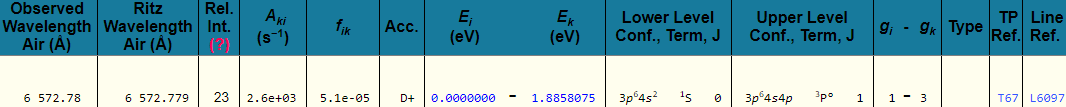

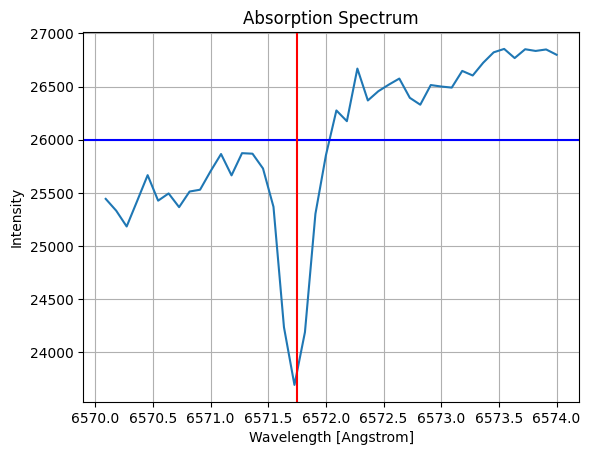

In [52]:
# Calcio 1 
plot_spectrum(data, 6570,6574, hor=26000, ver=6571.75
              )

In [53]:
# Step 1: Calculate the equilibrium width of CaI (6572.78)
_, CaI6572_eqwidth = Calc_eqWidth2(data=data, start= 6571.3, finish=6572, cIntensity=26000)
print("CaI6572_eqwidth: ", CaI6572_eqwidth)

print("Ratios are", AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35), AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35) * AtomsRatioIonized(chi=11.87172, z1=2.35, z2=1.0))

CaI6572_eqwidth:  0.02666258741256317
Ratios are 6776.792357744077 408.5091094145319
